In [4]:
from keras import layers
from keras import models

Using TensorFlow backend.


time: 4.22 s


Checking availability of GPU

In [11]:
import tensorflow as tf

tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.list_physical_devices(device_type=None)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

time: 3.37 ms


In [12]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

time: 5.55 s


### Preparing the data

Encoding the integer sequences into a binary matrix


In [13]:
import numpy as np

def vector_sequence(sequences,  dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i][sequence] = 1.
  return results

time: 3.37 ms


In [14]:
x_train = vector_sequence(train_data)
x_test = vector_sequence(test_data)

time: 3.25 s


In [15]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

time: 2.49 ms


### Building your network

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

time: 5.87 s


### Compiling the model

In [17]:
from keras import optimizers
from keras import losses
from keras import metrics

# model.compile(optimizer='rmsprop',
#                 loss='binary_crossentropy',
#                 metrics=['accuracy'])

model.compile(optimizer= optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])


time: 65.8 ms


### Validating the approach

Setting aside a validation set


In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

time: 1.7 ms


### Training the model

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size = 64,
                    epochs = 20,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 251us/step - loss: 0.3620 - binary_accuracy: 0.8513 - val_loss: 0.2735 - val_binary_accuracy: 0.8900
Epoch 2/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.2003 - binary_accuracy: 0.9240 - val_loss: 0.3160 - val_binary_accuracy: 0.8777
Epoch 3/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.1477 - binary_accuracy: 0.9449 - val_loss: 0.3225 - val_binary_accuracy: 0.8822
Epoch 4/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1129 - binary_accuracy: 0.9595 - val_loss: 0.3643 - val_binary_accuracy: 0.8781
Epoch 5/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.0843 - binary_accuracy: 0.9705 - val_loss: 0.4038 - val_binary_accuracy: 0.8770
Epoch 6/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.0634 - binary_accuracy: 0.9782 - val_loss: 0.4725 - val_bi

In [20]:
history_dic = history.history
history_dic.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

time: 2.84 ms


### Plotting the training and validation loss

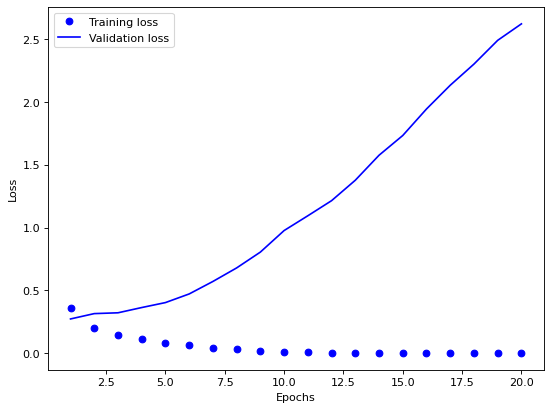

time: 245 ms


In [22]:
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

history_dic = history.history

acc = history_dic['binary_accuracy']
val_acc = history_dic['val_binary_accuracy']

loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Plotting the training and validation accuracy

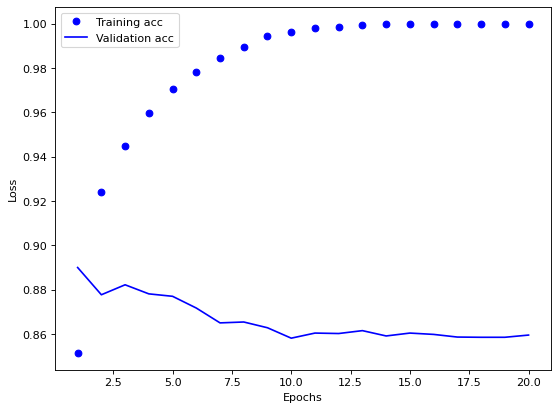

time: 251 ms


In [23]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [26]:
results = model.evaluate(x_test, y_test, batch_size=128)

25000/25000 [==============================] - 1s 50us/step
time: 1.26 s


In [28]:
print("test loss, test acc:", results)

test loss, test acc: [2.8461571408081054, 0.8438000082969666]
time: 1.32 ms
